<a href="https://colab.research.google.com/github/rakshaa2000/30-Days-of-ML/blob/main/Wine_Quality_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project detects and estimates the wine quality attributes of a wine with the help of Linear Regression.

This imports the necessary libraries for the execution of linear regression on the dataset.

In [1]:
#importing necessary libraries
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

The code below helps us to import the dataset from Local Computer to Google Colab

In [2]:
# Uploading the CSV files from the local computer
from google.colab import files
uploaded = files.upload()

Saving wineQualityRed_train.csv to wineQualityRed_train.csv
Saving wineQualityRed_test.csv to wineQualityRed_test.csv


The training and test dataset are different. We first read and format the training data set.

In [3]:
# Loading and formatting training data
# Setting the features as column headers
features =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
df = pd.read_csv('wineQualityRed_train.csv', sep=';', names=features, header=0)
df = pd.DataFrame(df)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5
1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8
2,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,5
3,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,5
4,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,6


We then find the correlation between the different features. This enables us to find the most important attribute.

fixed acidity           0.051378
volatile acidity       -0.426341
citric acid             0.237314
residual sugar         -0.015660
chlorides              -0.150763
free sulfur dioxide    -0.018760
total sulfur dioxide   -0.139017
density                -0.271300
pH                     -0.050295
sulphates               0.325453
alcohol                 0.492111
quality                 1.000000
Name: quality, dtype: float64


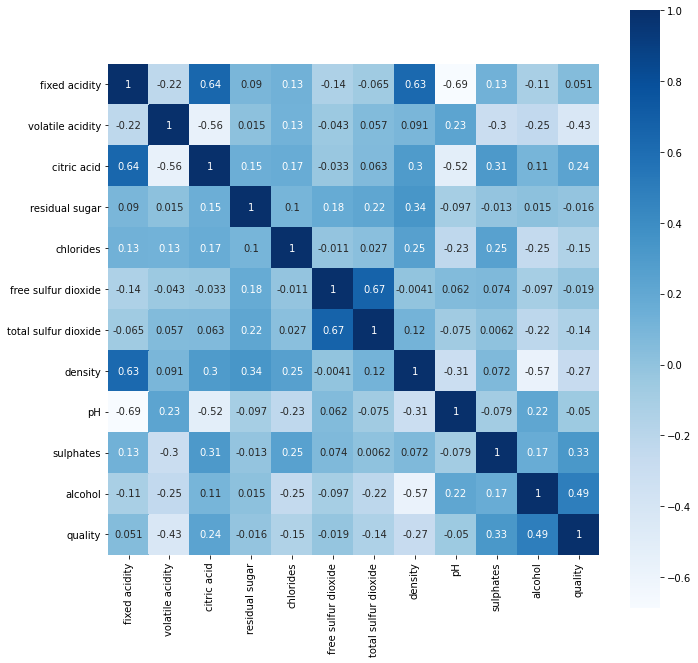

In [4]:
# Finding correlation between various parameters
correlation = df.corr()
print(correlation['quality'])

# Plotting the correlation matrix
fig, ax= plt.subplots(figsize=(11,11))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

We observe that the "alcohol" attribute has strong correlation with the "quality" attribute.

We now format the test dataset to predict and assess the error and accuracy in the model.

In [5]:
# Loading and formatting test data
df_test=pd.read_csv('wineQualityRed_test.csv', sep=';', names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"], header=0)
df_test = pd.DataFrame(df_test)
df_test.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,8.650417,0.536115,0.297000,2.549583,0.094542,15.078125,51.952083,0.997398,3.294646,0.696146,10.086667,5.564583
std,1.896574,0.176453,0.217777,1.249797,0.061136,9.726030,33.774207,0.001676,0.155418,0.213667,0.968518,0.769998
min,4.600000,0.180000,0.000000,1.200000,0.039000,3.000000,8.000000,0.991200,2.740000,0.330000,8.700000,3.000000
25%,7.400000,0.407500,0.100000,1.900000,0.073000,7.000000,26.000000,0.996400,3.190000,0.560000,9.400000,5.000000
50%,8.100000,0.530000,0.260000,2.200000,0.082000,12.500000,43.000000,0.997200,3.290000,0.635000,9.800000,5.000000
75%,9.625000,0.641250,0.480000,2.600000,0.093000,20.000000,67.000000,0.998400,3.380000,0.780000,10.500000,6.000000
max,15.600000,1.330000,1.000000,11.000000,0.611000,68.000000,165.000000,1.003200,3.900000,2.000000,14.000000,8.000000


This snippet trains the Linear regression model and checks the sum of
square error calculated between the predicted value from the features of the test dataset and the actual value for the "quality" attribute.

In [6]:
# A linear regression model
regression = LinearRegression()
# Features based on which regression should be performed
features =["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
# Fitting the training data
reg = regression.fit(df[features],df['quality'])
# Predicting the test data
y_pred = reg.predict(df_test[features])
# Actual values of the test data
y_test = df_test['quality']

# Printing coefficients, intercept and sum of square error
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
print('Sum of square error: %.2f' %np.sum(np.power(y_test-y_pred,2)))

Coefficients: 
 [-5.73100144e-03 -1.07148926e+00 -6.30475021e-02  1.02337212e-02
 -1.94044757e+00  3.51582257e-03 -2.15501378e-03 -2.68912590e+01
 -6.34244261e-01  1.24194845e+00  2.67754540e-01]
Intercept: 
 31.741831140740473
Sum of square error: 214.23


As we observed earlier that "alcohol" has the most correlation with "quality", we try to fit alcohol and quality in a new linear regression model and plot the spread.

Text(0, 0.5, 'Quality')

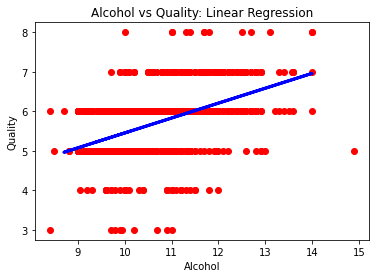

In [7]:
# A new linear regression model
regression = LinearRegression()
X_train = np.array(df['alcohol']).reshape(-1, 1)
reg = regression.fit(X_train,df['quality'])
X_test = np.array(df_test['alcohol']).reshape(-1, 1)
y_pred = reg.predict(X_test)
y_test = df_test['quality']

# Plot outputs
plt.scatter(X_train, df['quality'],  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title("Alcohol vs Quality: Linear Regression")
plt.xlabel("Alcohol")
plt.ylabel("Quality")